# Triple Decomposition Test

This notebook is about DESCRIBE

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter

In [4]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [3]:
ds = xr.open_dataset("/swot/SUM05/amf2288/sync-boxes/castro2024")

### 

In [7]:
lfilt = 200
var = 'CT'
var_m = ff.get_filt_single(ds, lfilt, var)

In [9]:
var_m

<xarray.DataArray (N_PROF: 1535, PRES_INTERPOLATED: 1001)> Size: 12MB
array([[ 9.06622403,  9.04907343,  9.03139827, ...,  2.96457322,
         2.96292401,  2.96131085],
       [ 3.51619477,  3.51617579,  3.5161564 , ...,  2.95914696,
         2.95877127,  2.95840723],
       [11.05516723, 11.03715718, 11.01845327, ...,  3.17398647,
         3.17352488,  3.17308197],
       ...,
       [ 9.57189213,  9.49955976,  9.4253177 , ...,  3.20869509,
         3.20806318,  3.20744903],
       [ 9.35794835,  9.28540144,  9.21098088, ...,  3.20535395,
         3.20464552,  3.20395316],
       [ 7.72852739,  7.69633901,  7.66292819, ...,  3.17559283,
         3.17489021,  3.174206  ]])
Coordinates:
  * N_PROF             (N_PROF) int64 12kB 8381 1343 8961 ... 4457 4458 4459
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 8kB 0 2 4 6 ... 1996 1998 2000
    LATITUDE           (N_PROF) float64 12kB 55.8 57.31 56.98 ... 55.04 55.08
    LONGITUDE          (N_PROF) float64 12kB -31.82 -44.65 ... -44.35 -43.1
    N_PROF_NEW         (N_PROF) int64 12kB 0 1 2 3 4 ... 1531 1532 1533 1534
    mask               (N_PROF, PRES_INTERPOLATED) float64 12MB 0.0 0.0 ... 0.0

In [8]:
K_rho = 1

In [10]:
var_3 = 2*K_rho*(np.diff(var_m,axis=1))**2

In [16]:
np.shape(var_3[0])

(1000,)

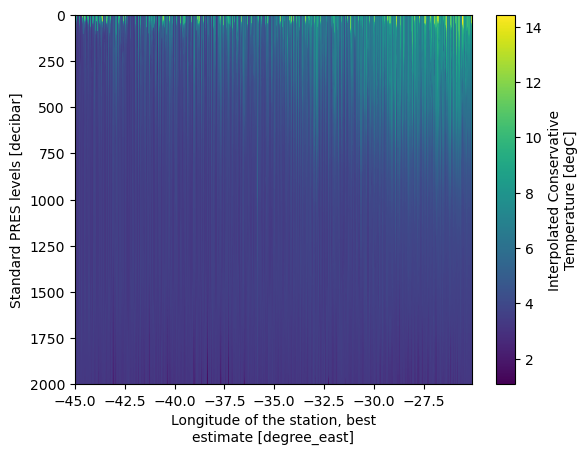

In [22]:
x='LONGITUDE'

ds.CT.sortby(x).plot(x=x, y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()